# 検定と精度（分散/標準偏差）のつながり

このノートは、**推定量の精度（分散/MSE）**と**検定統計量の標準化**を一つの流れで確認するための整理メモです。

- 推定：精度 = 分散（不偏なら MSE=Var）
- 検定：差を分散（標準誤差）で割って何σかを見る
- プーリング：帰無仮説の下で分散に入る母数を推定して差し込む


## 1. 推定の精度 = MSE と分散

推定量 $\hat\theta$ の良さは

$$\mathrm{MSE}(\hat\theta)=E[(\hat\theta-\theta)^2]=\mathrm{Var}(\hat\theta)+\mathrm{Bias}(\hat\theta)^2$$

不偏なら $\mathrm{Bias}=0$ で **MSE=Var**。
**不偏推定量同士なら分散が小さい方が精度が高い**、が基本です。


## 2. 標準化（検定統計量）の意味

検定でも推定でも、よく

$$Z=\frac{\hat\theta-\theta_0}{\mathrm{SE}(\hat\theta)},\quad \mathrm{SE}=\sqrt{\mathrm{Var}}$$

のように **標準誤差で割る**。意味は

- 分子：ズレ（信号）
- 分母：そのズレがどれくらい普通に出るか（ノイズの尺度）

→ 「何σズレたか」に変換して比較可能にする。


## 2.1 インタラクティブ: 標準誤差とサンプルサイズ

分散 $\sigma^2$ を動かして、**標準誤差 $\sqrt{\sigma^2/n}$** の減り方を可視化します。
（スライダーが動かない場合は `matplotlib` のウィジェット対応バックエンドを利用してください）


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

n_min, n_max = 5, 200
n_values = np.arange(n_min, n_max + 1)
sigma2_init = 1.0

fig, ax = plt.subplots(figsize=(8, 4))
plt.subplots_adjust(bottom=0.25)

line, = ax.plot(n_values, np.sqrt(sigma2_init / n_values), color="steelblue")
ax.set_title("標準誤差とサンプルサイズの関係")
ax.set_xlabel("サンプルサイズ n")
ax.set_ylabel("標準誤差 SE")
ax.grid(True)

slider_ax = plt.axes([0.2, 0.1, 0.65, 0.03])
sigma2_slider = Slider(slider_ax, "分散 σ²", 0.1, 10.0, valinit=sigma2_init, valstep=0.1)

def update(_):
    sigma2 = sigma2_slider.val
    line.set_ydata(np.sqrt(sigma2 / n_values))
    fig.canvas.draw_idle()

sigma2_slider.on_changed(update)
plt.show()


## 3. プーリング推定（2標本比率）の例

データ（20代のSNS利用の架空集計）：

|        | 利用している | 利用していない | 計 |
|:--|--:|--:|--:|
| 20代男 | 38 | 73 | 111 |
| 20代女 | 60 | 46 | 106 |
| 計 | 98 | 119 | 217 |

帰無仮説 $H_0: p_1=p_2=p$ の下では

$$D=\hat p_1-\hat p_2,\quad \mathrm{Var}(D)=p(1-p)\left(\frac1{n_1}+\frac1{n_2}\right)$$

$p$ が未知なので **プール推定量**

$$\hat p=\frac{x_1+x_2}{n_1+n_2}$$

を分母に入れて

$$Z=\frac{D}{\sqrt{\hat p(1-\hat p)\left(\frac1{n_1}+\frac1{n_2}\right)}}$$

を作る。**差を分散で割って無次元化する**のが核。


## プールZと相関あり平均Zの“型”の対応

以下の2表で、**プーリング推定のZ** と **（AR(1)みたいな）相関あり平均のZ** が同じ型だと一発で見えるように並べる。

---

### 表1：Z統計量の“型”の対応（分子＝ズレ、分母＝そのズレの標準誤差）

|           | **2母比率の差の検定（プールZ）** | **平均$\mu$の検定（時系列・相関あり）** |
| --------- | ------------------------------ | ---------------------------------------- |
| データ | 2群の0/1（成功回数） | 時系列 $y_t=\mu+u_t$ |
| 推定したいもの | $p_1-p_2$ | $\mu$ |
| 帰無仮説 | $H_0:p_1=p_2=p$ | $H_0:\mu=\mu_0$ |
| 推定量（分子） | $D=\hat p_1-\hat p_2$ | $\hat\mu=\bar y_T$（分子は $\bar y_T-\mu_0$） |
| 標準化（Z） | $\displaystyle Z=\frac{\hat p_1-\hat p_2}{\sqrt{\widehat{\mathrm{Var}}(D\mid H_0)}}$ | $\displaystyle Z=\frac{\bar y_T-\mu_0}{\sqrt{\widehat{\mathrm{Var}}(\bar y_T)}}$ |
| “未知”が入る場所 | $\mathrm{Var}(D\mid H_0)$ の中に $p$ | $\mathrm{Var}(\bar y_T)$ の中に $\gamma(h)$ や $\sigma_u^2$ |

---

### 表2：分母（分散/SE）の“中身”の対応（共分散が0か残るか）

|                 | **2母比率（プールZ）** | **時系列平均（相関込み）** |
| --------------- | ---------------------- | -------------------------- |
| 分散の基本形 | $\displaystyle \mathrm{Var}(D)=\mathrm{Var}(\hat p_1-\hat p_2)$ | $\displaystyle \mathrm{Var}(\bar y_T)=\mathrm{Var}\!\left(\frac1T\sum_t y_t\right)$ |
| 共分散の扱い | 2群は独立（クロス項0） | 時点間に共分散が残る |
| 分散（理論） | $\displaystyle \mathrm{Var}(D\mid H_0)=p(1-p)\Big(\frac1{n_1}+\frac1{n_2}\Big)$ | $\displaystyle \mathrm{Var}(\bar y_T)=\frac{1}{T^2}\sum_{i=1}^T\sum_{j=1}^T\mathrm{Cov}(y_i,y_j)$ |
| “$\gamma$”が出る理由 | （出ない：iid扱いで十分） | 定常なら $\mathrm{Cov}(y_i,y_j)=\gamma(i-j)$ と「ラグだけで書ける」から |
| ラグで書き直すと | — | $\displaystyle \mathrm{Var}(\bar y_T)=\frac{1}{T^2}\Big(T\gamma(0)+2\sum_{h=1}^{T-1}(T-h)\gamma(h)\Big)$ |
| AR(1)なら | — | $\gamma(h)=\sigma_u^2\alpha^{h}$（$\alpha>0$なら全部プラス上乗せ） |
| “プール”に相当する操作 | $p$ が未知なので $H_0$ に合わせて $\hat p=\frac{x_{1}+x_{2}}{n_1+n_2}$ を入れる | $\gamma(h)$ や $\sigma_u^2$ が未知なので、それを推定して分母に入れる（モデル推定/サンプル自己共分散など） |
| 直感 | **分母＝帰無の下のばらつき** を推定して割る | **分母＝相関込みのばらつき** を推定して割る（相関があると分母が大きくなる） |

---

### ひとことで接続

* どっちも **「ズレ」÷「ズレの標準偏差（SE）」**。
* そのSEを作るとき、未知母数が混ざるから **推定して差し込む**。
  * 2比率はそれが **プール（$\hat p$）**
  * 時系列はそれが **相関（$\gamma(h)$）込み分散の推定**

---

## DataArtsの表（男38/111、女60/106）でプールZを実計算

以下、DataArtsの表（男 38/111、女 60/106）で **プール推定Z** を実計算。
「$\hat p$ がどこに入るか」が見えるように **2表**で出す。

---

### 表1：入力（度数）→ 比率 $\hat p_1,\hat p_2$

| 群 | 利用している（成功） | 利用していない | 合計 $n$ | 標本比率 $\hat p$ |
| -------- | -----------: | ------: | ------------: | ----------------------------: |
| 20代男（群1） | $x_1=38$ | 73 | $n_1=111$ | $\hat p_1=38/111=0.342342...$ |
| 20代女（群2） | $x_2=60$ | 46 | $n_2=106$ | $\hat p_2=60/106=0.566038...$ |
| 合計 | $x_1+x_2=98$ | 119 | $n_1+n_2=217$ | |

差（分子に使う）

$$
\hat p_1-\hat p_2=0.342342...-0.566038...=-0.223695...
$$

---

### 表2：Zの分母（標準誤差）に $\hat p$ を入れる場所

帰無仮説 $H_0:p_1=p_2=p$ の下で

$$
Z=\frac{\hat p_1-\hat p_2}{\sqrt{\hat p(1-\hat p)\left(\frac1{n_1}+\frac1{n_2}\right)}}
$$

| 部品 | 値 | 中身 |
| ------------------------- | ------------------: | -------------------------------------------------- |
| **プール推定 $\hat p$** | $98/217=0.4516129$ | $\hat p=\dfrac{x_1+x_2}{n_1+n_2}$ ← **ここが「プーリング」** |
| $(1-\hat p)$ | $119/217=0.5483871$ | |
| $\hat p(1-\hat p)$ | $0.2476586889$ | |
| $\frac1{n_1}+\frac1{n_2}$ | $0.01844297127$ | $1/111+1/106$ |
| 分散（分母の中） | $0.004567562084$ | $\hat p(1-\hat p)(1/n_1+1/n_2)$ |
| **標準誤差 SE** | $0.06758374127$ | $\sqrt{	ext{上}}$ |
| **Z** | $-3.309899531$ | $(-0.2236953935)/0.06758374127$ |
| 両側p値 | $\approx 0.000933$ | $2(1-\Phi(Z))$ |

---

### 判定（例：両側5%）

$|Z|=3.31>1.96$ なので **$H_0$ 棄却**（男女で利用率に差あり）。
符号が負なので $\hat p_1<\hat p_2$ ⇒ **女の方が利用率が高い**。

---

※参考（違いの確認用）：プールしないSE（Wald）だと

$\mathrm{SE}=\sqrt{\hat p_1(1-\hat p_1)/n_1+\hat p_2(1-\hat p_2)/n_2}=0.065922$、
$Z=-3.393$ で結論は同じ。


In [4]:
import numpy as np

x1, n1 = 38, 111
x2, n2 = 60, 106
p1 = x1 / n1
p2 = x2 / n2
p_pool = (x1 + x2) / (n1 + n2)
D = p1 - p2
se = np.sqrt(p_pool * (1 - p_pool) * (1 / n1 + 1 / n2))
z = D / se
p1, p2, p_pool, D, se, z


(0.34234234234234234,
 0.5660377358490566,
 0.45161290322580644,
 -0.22369539350671425,
 np.float64(0.06758374127184555),
 np.float64(-3.3098995305236625))

### 補足：Z検定の可視化（ジェンダー $G$ と Instagram利用 $U$）

手書きノートの整理に基づく定義：
- **$G$ (Gender)**：性別（$m$: 男性, $f$: 女性）
- **$U$ (Use)**：Instagram利用有無（$1$: 利用, $0$: 非利用）

帰無仮説 $H_0: p_1 = p_2$（男女で利用率に差がない）の下で、検定統計量 $Z$ は標準正規分布 $N(0,1)$ に従います。
以下のグラフは、算出された $Z$ 値（青線）が棄却域（赤色領域, 両側5%）に含まれていることを示しています。


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import japanize_matplotlib

# 前のセルの計算値を使用（再定義）
x1, n1 = 38, 111
x2, n2 = 60, 106
p1 = x1 / n1
p2 = x2 / n2
p_pool = (x1 + x2) / (n1 + n2)
se = np.sqrt(p_pool * (1 - p_pool) * (1 / n1 + 1 / n2))
z_score = (p1 - p2) / se

# 1. 標準正規分布上でのZ検定の可視化
x = np.linspace(-5, 5, 1000)
y = stats.norm.pdf(x, 0, 1)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 正規分布の描画
ax = axes[0]
ax.plot(x, y, label='標準正規分布 $N(0,1)$', color='gray')
ax.fill_between(x, y, where=(x <= -1.96) | (x >= 1.96), color='red', alpha=0.3, label='棄却域 (5%)')
ax.axvline(z_score, color='blue', linestyle='--', linewidth=2, label=f'観測されたZ = {z_score:.2f}')
ax.set_title('Z検定統計量の位置')
ax.set_xlabel('Z値')
ax.set_ylabel('確率密度')
ax.legend(loc='upper left')
ax.text(z_score, max(y)/2, f'  Z={z_score:.2f}', color='blue', ha='right', fontsize=12)

# 2. 利用率の棒グラフ（エラーバー付き）
ax = axes[1]
# 各群の標準誤差（Wald）
se1 = np.sqrt(p1 * (1 - p1) / n1)
se2 = np.sqrt(p2 * (1 - p2) / n2)
# 95%信頼区間
ci1 = 1.96 * se1
ci2 = 1.96 * se2

labels = ['男性 (G=m)', '女性 (G=f)']
proportions = [p1, p2]
errors = [ci1, ci2]

bars = ax.bar(labels, proportions, yerr=errors, capsize=10, color=['skyblue', 'pink'], alpha=0.7)
ax.set_ylim(0, 1.0)
ax.set_title('ジェンダー別 Instagram利用率 (U=1)')
ax.set_ylabel('利用率 (p)')

for bar, prop in zip(bars, proportions):
    ax.text(bar.get_x() + bar.get_width()/2, prop + 0.05, f'{prop:.3f}', ha='center')

plt.tight_layout()
plt.show()

## 4. 自己相関があると平均の分散はどう増えるか

AR(1) の平均 $\bar y_T$ は

$$\mathrm{Var}(\bar y_T)=\frac{1}{T^2}\sum_{i=1}^T\sum_{j=1}^T\mathrm{Cov}(y_i,y_j)$$

で、正の自己相関があると IID より分散が大きくなります。
ここではシミュレーションで **ACF** と **平均の分散比**を確認します。


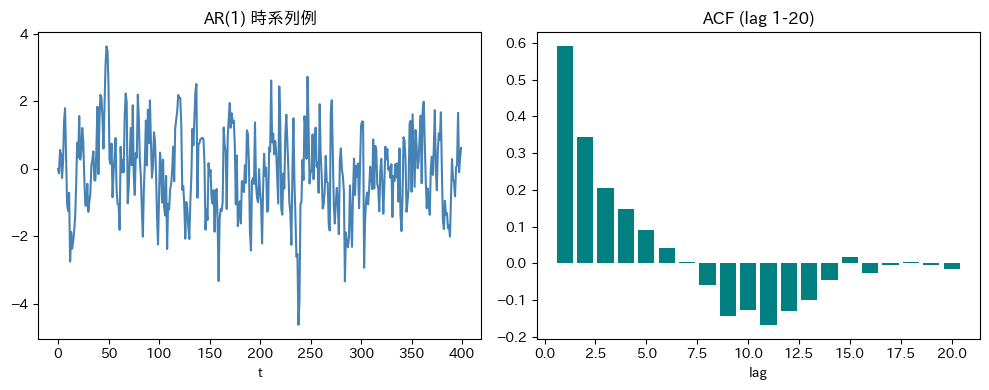

(np.float64(0.015563733470616107),
 np.float64(0.002436301640655674),
 np.float64(6.388262114549777))

In [5]:
import matplotlib.pyplot as plt
import japanize_matplotlib

rng = np.random.default_rng(0)

def simulate_ar1(alpha=0.5, sigma=1.0, T=400):
    y = np.zeros(T)
    eps = rng.normal(0, sigma, T)
    for t in range(1, T):
        y[t] = alpha * y[t - 1] + eps[t]
    return y

def acf(x, max_lag=20):
    x = x - x.mean()
    denom = np.dot(x, x)
    return np.array([np.dot(x[:-lag], x[lag:]) / denom for lag in range(1, max_lag + 1)])

T = 400
alpha = 0.6
y = simulate_ar1(alpha=alpha, T=T)
iid = rng.normal(0, 1.0, T)

lags = np.arange(1, 21)
acf_y = acf(y, 20)

var_mean_ar = np.var([simulate_ar1(alpha=alpha, T=T).mean() for _ in range(500)])
var_mean_iid = np.var([rng.normal(0, 1.0, T).mean() for _ in range(500)])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].plot(y, color='steelblue')
axes[0].set_title('AR(1) 時系列例')
axes[0].set_xlabel('t')

axes[1].bar(lags, acf_y, color='teal')
axes[1].set_title('ACF (lag 1-20)')
axes[1].set_xlabel('lag')

plt.tight_layout()
plt.show()

var_mean_ar, var_mean_iid, var_mean_ar / var_mean_iid


## 5. Wilcoxon順位和（順位に基づく推定の例）

ここでは、問題の数値そのまま使って**順位ベースの推定**の雰囲気を確認します。

- A群: 125, 127, 131
- B群: 132, 138, 144

### 5.1 順位づけと順位和
小さい順に並べると

| 値 | 群 | 順位 |
|---:|:--:|:---:|
|125|A|1|
|127|A|2|
|131|A|3|
|132|B|4|
|138|B|5|
|144|B|6|

A群の順位和は $R_A=1+2+3=6$、B群は $R_B=4+5+6=15$ です。

### 5.2 ウィルコクソン統計量の“推定的な見方”
順位和から

- $U_A = R_A - \frac{n_A(n_A+1)}{2} = 6 - 6 = 0$
- $U_B = n_A n_B - U_A = 9$

が得られます（$n_A=n_B=3$）。

$U_A/(n_A n_B)$ は **「AがBより小さい確率」**の自然な推定量と解釈できます。
この例では $U_A/(n_A n_B)=0$ なので、
**観測された範囲では A の値が常に B より小さい** ことを意味します。

検定の話はこの先で通常の有意性評価に接続できますが、
ここでは**順位和自体が差の大きさを推定している**という点だけ押さえておけば十分です。


## 6. まとめ

- **推定**：不偏なら精度 = 分散（MSE=Var）
- **検定**：$\hat\theta-\theta_0$ を $\sqrt{\mathrm{Var}}$ で割って「何σ」かを見る
- **プーリング**：分散中の未知母数を $H_0$ の形で推定して差し込む

推定と検定は **“分散で割る”という共通構造**で一本化できます。
